### Explain data set

Data Definition:This data set classifies the price ranges of phones according 20 features.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("telephone.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


###### Data Preprocessing

In [4]:
X = data.drop(['price_range'],axis=1)
Y = data.price_range

In [5]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [6]:
Y.unique()

array([1, 2, 3, 0], dtype=int64)

There are 4 different price range.

###### Data Scaled

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

### Decision Tree Classifier

In [8]:
#import necessary library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statistics
from sklearn.metrics import classification_report

#### Cross Validation

In [9]:
kfold=5
skfolds = StratifiedKFold(n_splits=kfold)
accuracy = []
total_confison = 0 #confusion matrix
i = 1
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], Y[train_index], Y[test_index]
    clf_total = DecisionTreeClassifier()
    clf_total.fit(x_train,y_train)
    predict  = clf_total.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
    print(i,"fold","Accuracy for",a)
    i=i+1
accuracy_decision_tree = statistics.mean(accuracy) 
print("\nAvarage accuracy: ", accuracy_decision_tree)

1 fold Accuracy for 0.84
2 fold Accuracy for 0.84
3 fold Accuracy for 0.8025
4 fold Accuracy for 0.815
5 fold Accuracy for 0.8125

Avarage accuracy:  0.822


In [10]:
print(total_confison,"\n")
print(classification_report(y_test,predict))

[[447  53   0   0]
 [ 57 379  64   0]
 [  0  59 383  58]
 [  0   0  65 435]] 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       100
           1       0.70      0.72      0.71       100
           2       0.76      0.69      0.72       100
           3       0.90      0.94      0.92       100

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



### Feature Importance

There are multiple features and how much each of them affects the price range, this should be observed. Because the accuracy rate can increase and the program run time decreases.

<AxesSubplot:>

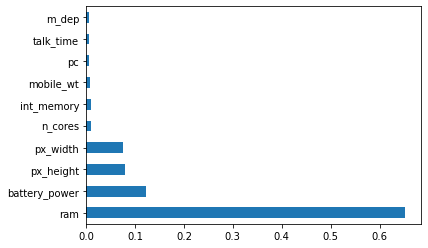

In [11]:
feature_importance = pd.Series(clf_total.feature_importances_,index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')

In [12]:
best = feature_importance.nlargest(4).index.to_list()
print(best)
X_imp = X[feature_importance.nlargest(4).index]
X_imp_scaled = StandardScaler().fit_transform(X_imp)

['ram', 'battery_power', 'px_height', 'px_width']


In [13]:
kfold=5
skfolds = StratifiedKFold(n_splits=kfold)
accuracy = []
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_imp_scaled[train_index], X_imp_scaled[test_index], Y[train_index], Y[test_index]
    clf_imp = DecisionTreeClassifier()
    clf_imp.fit(x_train,y_train)
    predict  = clf_imp.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
accuracy_decision_tree_with_feature_importance = statistics.mean(accuracy)
print("\nAvarage accuracy: ", accuracy_decision_tree_with_feature_importance)


Avarage accuracy:  0.861


### Decision Tree Depth

While classifying, the depth of the tree can be determined. 

Determining max depth to give an idea while drawing graphics.

In [14]:
kfold=5
skfolds = StratifiedKFold(n_splits=kfold)
accuracy = []
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_imp_scaled[train_index], X_imp_scaled[test_index], Y[train_index], Y[test_index]
    clf_imp = DecisionTreeClassifier(max_depth = 5)
    clf_imp.fit(x_train,y_train)
    predict  = clf_imp.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
print("\nAvarage accuracy: ", statistics.mean(accuracy))


Avarage accuracy:  0.8235


### Plotting Tree 

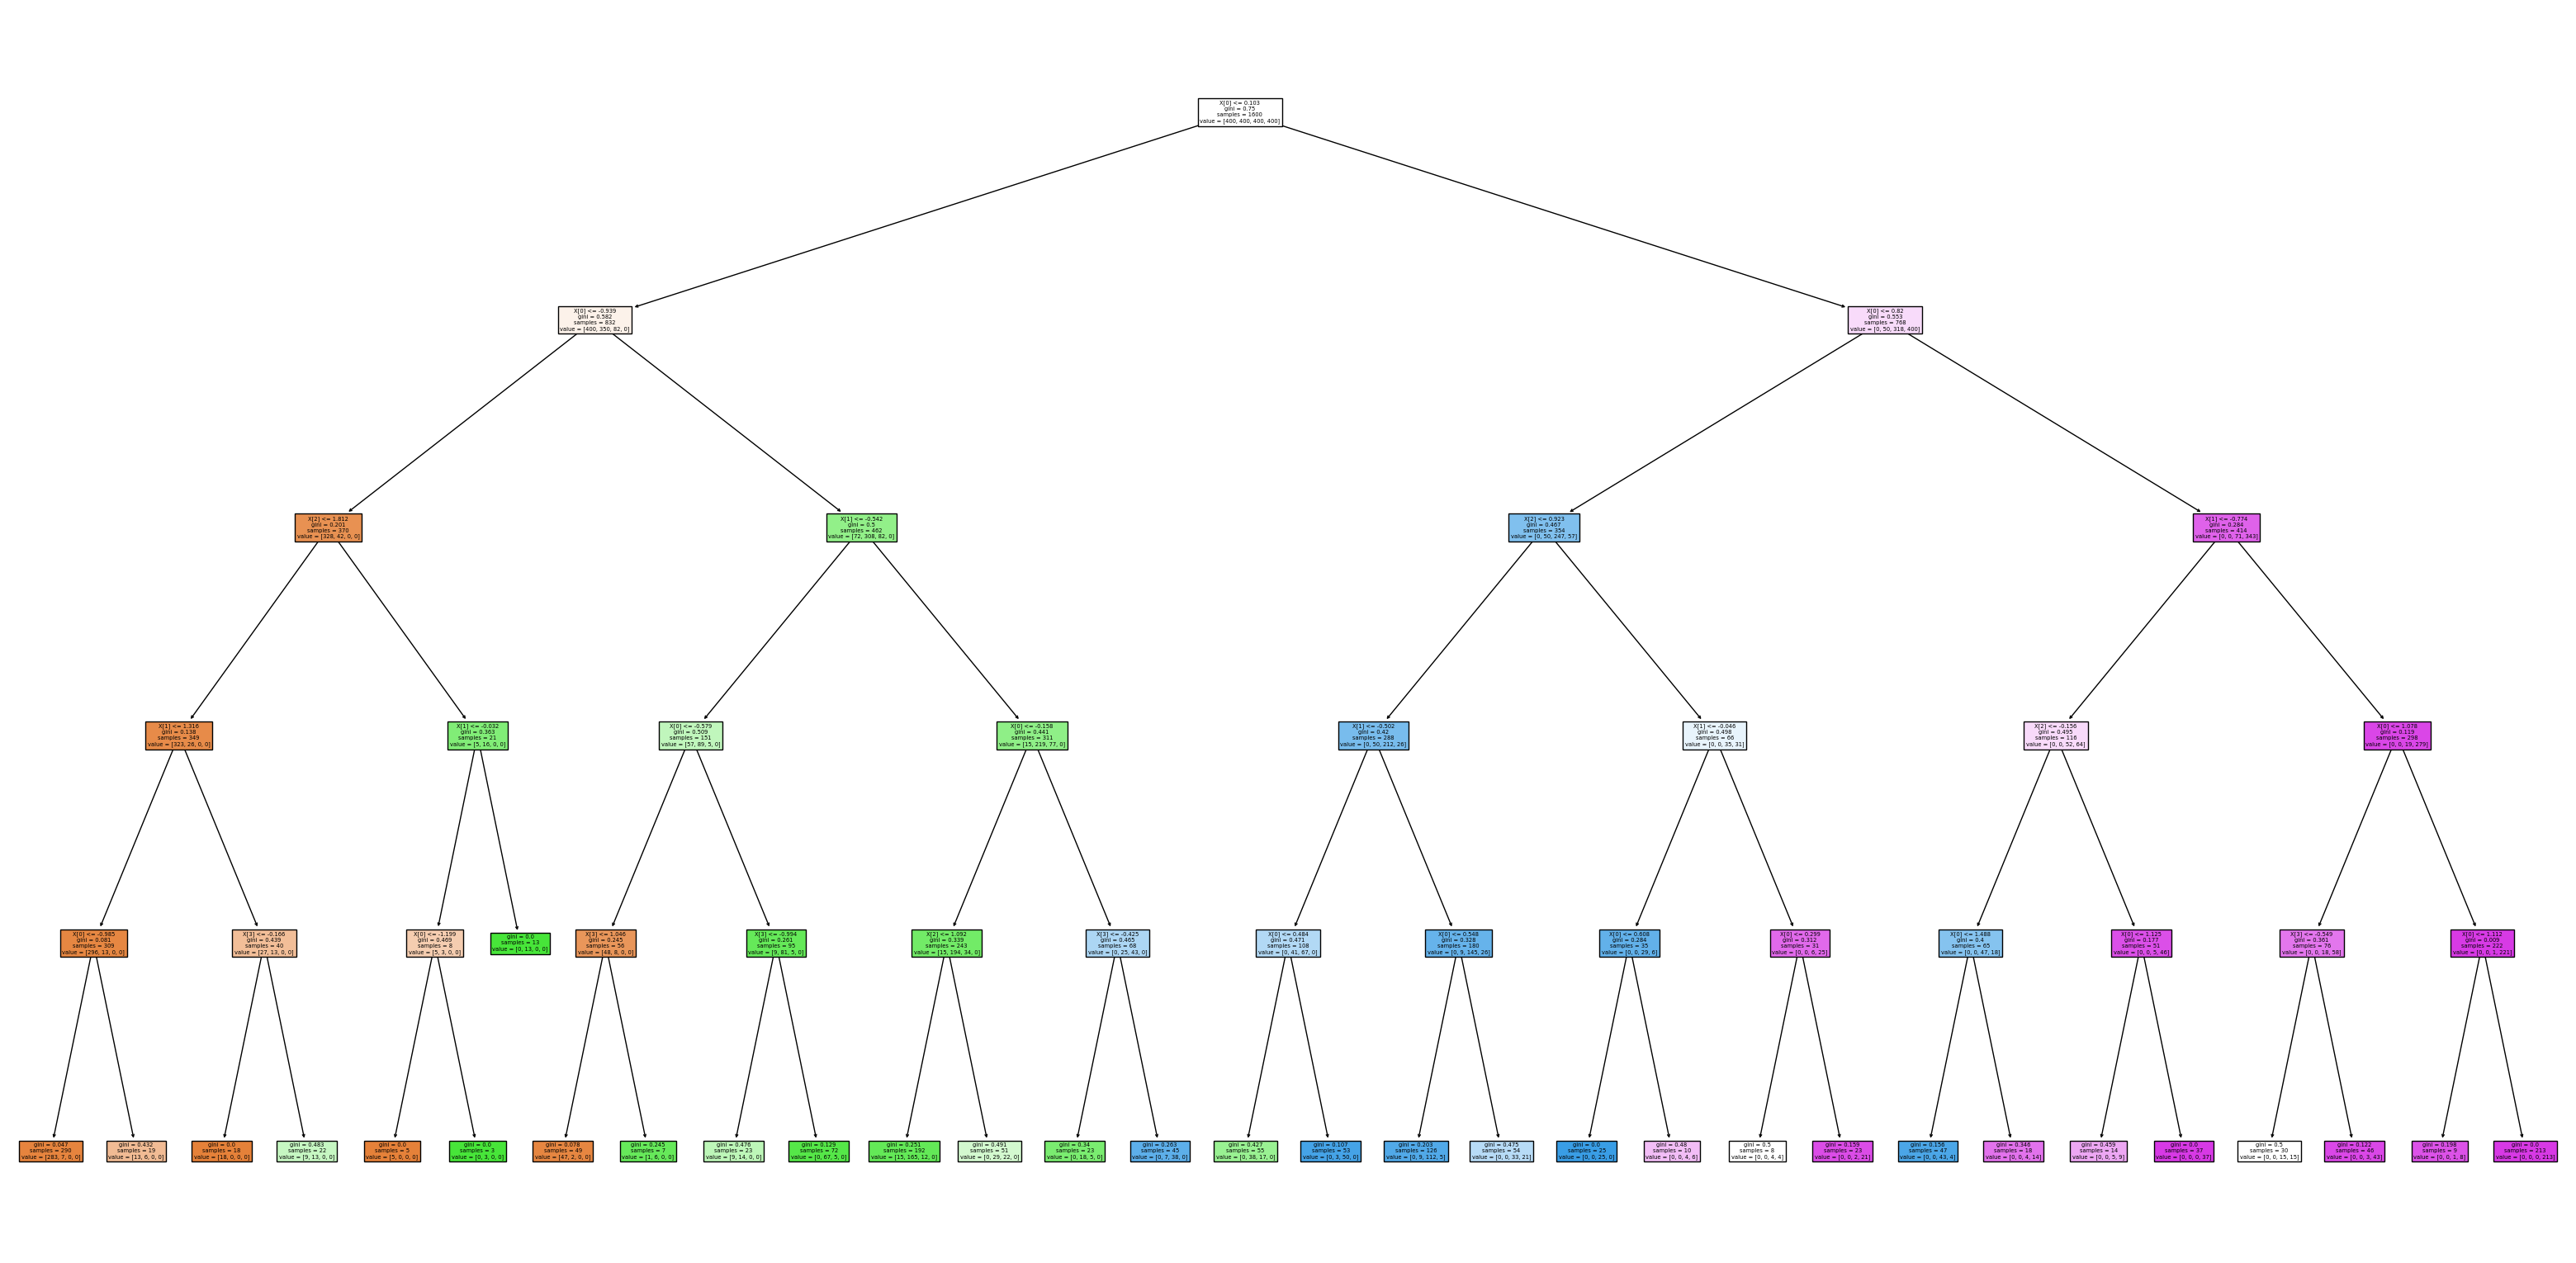

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib.pyplot import figure
%matplotlib inline

plt.figure(figsize=(40,20),dpi=100)
tree.plot_tree(clf_imp,filled=True)
plt.show()

### Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
kfold=5
skfolds = StratifiedKFold(n_splits=kfold)
accuracy = []
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], Y[train_index], Y[test_index]
    clf_forest = RandomForestClassifier()
    clf_forest.fit(x_train,y_train)
    predict  = clf_forest.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
    print("Accuracy:",a)
accuracy_random_forest = statistics.mean(accuracy)
print("\nAvarage accuracy: ", accuracy_random_forest)

Accuracy: 0.8625
Accuracy: 0.8775
Accuracy: 0.8975
Accuracy: 0.89
Accuracy: 0.855

Avarage accuracy:  0.8765


### Feature Importance

In [18]:
kfold=5
skfolds = StratifiedKFold(n_splits=kfold)
accuracy = []
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_imp_scaled[train_index], X_imp_scaled[test_index], Y[train_index], Y[test_index]
    forest_imp = RandomForestClassifier()
    forest_imp.fit(x_train,y_train)
    predict  = forest_imp.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
accuracy_random_forest_with_feature_importance = statistics.mean(accuracy)
print("\nAvarage accuracy: ", accuracy_random_forest_with_feature_importance)


Avarage accuracy:  0.91


### Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_imp_scaled[train_index], X_imp_scaled[test_index], Y[train_index], Y[test_index]
    clf_bagging=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
    clf_bagging.fit(x_train,y_train)
    predict  = clf_bagging.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
accuracy_bagging = statistics.mean(accuracy)
print("\nAvarage accuracy: ", accuracy_bagging)


Avarage accuracy:  0.9


In [20]:
print(total_confison)

[[473  27   0   0]
 [ 35 446  19   0]
 [  0  44 421  35]
 [  0   0  60 440]]


### Boosting

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
total_confison = 0
for train_index,test_index in skfolds.split(X,Y):
    x_train, x_test, y_train, y_test = X_imp_scaled[train_index], X_imp_scaled[test_index], Y[train_index], Y[test_index]
    clf_bagging=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
    clf_bagging.fit(x_train,y_train)
    predict  = clf_bagging.predict(x_test)
    con = confusion_matrix(y_test,predict)
    total_confison += con
    a = metrics.accuracy_score(y_test, predict)
    accuracy.append(a)
accuracy_boosting = statistics.mean(accuracy)
print("\nAvarage accuracy: ", accuracy_boosting)


Avarage accuracy:  0.8961666666666667


In [22]:
print(total_confison)

[[473  27   0   0]
 [ 37 436  27   0]
 [  0  50 418  32]
 [  0   0  50 450]]


### Comparing Performance 

Random forest and decision tree comparison without feature importance

In [23]:
print("Decision Tree Accuracy:",format(accuracy_decision_tree,'.3f'))
print("Random Forest Accuracy:",format(accuracy_random_forest,'.3f'))

Decision Tree Accuracy: 0.822
Random Forest Accuracy: 0.876


Comparison when doing feature importance

In [24]:
print("Decision Tree Accuracy",format(accuracy_decision_tree_with_feature_importance,'.3f'))
print("Random Forest Accuracy:",format(accuracy_random_forest_with_feature_importance,'.3f'))
print("Bagging Accuracy:",format(accuracy_bagging,'.3f'))
print("Boosting Accuracy:",format(accuracy_boosting,'.3f'))

Decision Tree Accuracy 0.861
Random Forest Accuracy: 0.910
Bagging Accuracy: 0.900
Boosting Accuracy: 0.896


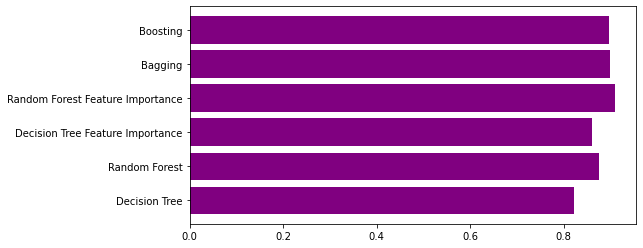

In [25]:
accuracy = [accuracy_decision_tree,accuracy_random_forest,accuracy_decision_tree_with_feature_importance
           ,accuracy_random_forest_with_feature_importance,accuracy_bagging,accuracy_boosting]
x = ['Decision Tree','Random Forest','Decision Tree Feature Importance',
    'Random Forest Feature Importance','Bagging','Boosting']
fig = plt.figure(figsize=(8,4))
plt.barh(x, accuracy,color='purple')
plt.show()

Dataset:

https://www.kaggle.com/iabhishekofficial/mobile-price-classification